In [39]:
from citalopram_project.load import load_neurons
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style("whitegrid")

neurons = (
    load_neurons()
    .dropna()
    .loc[lambda x: x.group.isin(["sal", "continuation"])]
    .assign(group=lambda x: pd.Categorical(x.group, categories=["sal", "continuation"], ordered=True))
)

In [33]:
neurons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   neuron_id             326 non-null    int64   
 1   mean_firing_rate      326 non-null    float64 
 2   cv2_isi               326 non-null    float64 
 3   recording_session_id  326 non-null    int64   
 4   cluster_id            326 non-null    int64   
 5   channel               326 non-null    int64   
 6   is_single_unit        326 non-null    int64   
 7   session_name          326 non-null    object  
 8   group_name            326 non-null    object  
 9   experiment_name       326 non-null    object  
 10  group                 326 non-null    category
 11  cluster               326 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 31.0+ KB


In [34]:
# neurons = neurons.loc[lambda x: x.mean_firing_rate != "slow_regular"].copy()

# neurons["mean_firing_rate"] = neurons["mean_firing_rate"].astype(float)
# neurons["cv2_isi"] = neurons["mean_firing_rate"].astype(float)

In [35]:
neurons.loc[lambda x: (x.cluster == "fast_firing") & (x.mean_firing_rate < 5) & (x.cv2_isi < 0.7), "cluster"] = "slow_regular"
neurons.loc[lambda x: (x.cluster == "fast_firing") & (x.mean_firing_rate < 5) & (x.cv2_isi >= 0.7), "cluster"] = "slow_irregular"

In [36]:
out_path = r"C:\Users\roryl\repos\citalopram-project\data\neurons.parquet.gzip"

(0.0, 27.0)

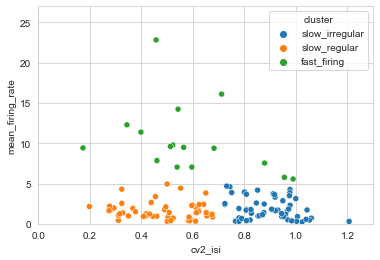

In [40]:
dfp = neurons.loc[lambda x: x.group == "sal"]

ax = sns.scatterplot(x="cv2_isi", y="mean_firing_rate", hue="cluster", data=dfp)
ax.set_xlim([0, 1.3])
ax.set_ylim([0, 27])

In [38]:
neurons.to_parquet(out_path, compression="gzip")